# Convolution methods
Vyom Raval; Thurs Apr 11 2024

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat

In [2]:
# % Define a Gaussian filter
# gauss = @(p,x)((p(2)*sqrt(2*pi))^-1 * exp(-0.5*((x+p(1)).^2/(2*p(2)^2))));
# % Generate a random signal.
# s = randn(1,10000);
# % Define a time domain for the filter.
# t=0:100;
# % Create the filter.
# filter_mean=0.0;
# filter_std = 10;
# f = gauss([filter_mean,filter_std],t);

In [3]:
# Define Gaussian filter
gauss = lambda p, x: 1/(p[1]*np.sqrt(2*np.pi)) * np.exp(-0.5 * ((x+p[0])**2)/(2*p[1]**2))

# Generate random signal
# s = np.random.randn(1, 10000)

# Create gaussian filter with mean 0, sigma 10
t = np.arange(101)
mu, sigma = 0.0, 10.0
f = gauss([mu, sigma], t)

In [4]:
e_data = loadmat('conv_exercise.mat')
e_data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'f', 'f1', 'f2', 'f3', 'f4', 's'])

In [5]:
np.allclose(e_data['f1'][100:], e_data['f4'][100:])

True

In [6]:
np.allclose(e_data['f3'][100:], e_data['f4'][100:])

True

In [7]:
s = e_data['s']

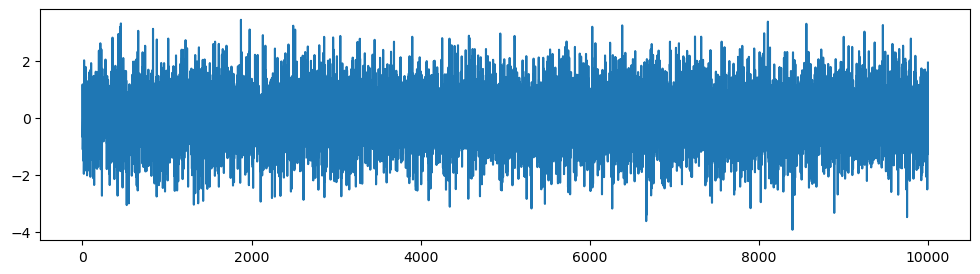

In [8]:
plt.figure(figsize=(12,3))
plt.plot(s[0])

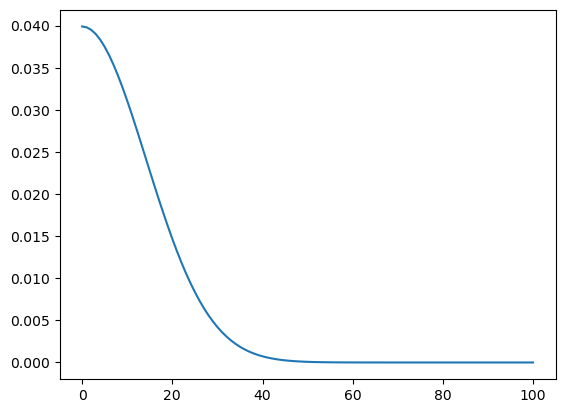

In [9]:
plt.plot(f)

## Method 1: for loops

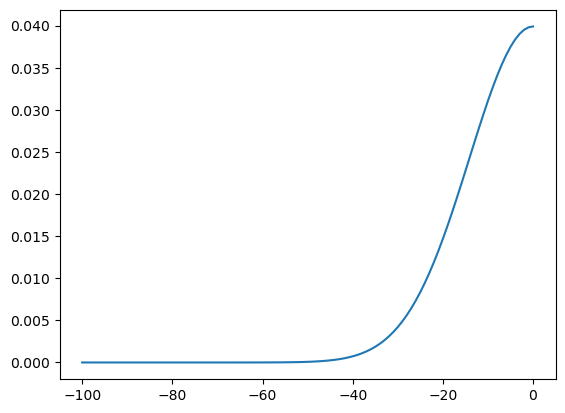

In [10]:
# Flip filter
ff = np.flip(f)
# ff*=0.5
plt.plot(-t[::-1],ff)

In [11]:
# Filtered version of s with method 1
s1 = np.zeros(s.shape)

len_f = len(f)
len_s = s.shape[1]
print(f'Filter is of length {len_f}, signal is of length {len_s}')

for idx_s in np.arange(len_f-1, len_s): # Want to start at 100th element (idx 99)
    for idx_f in np.arange(0, len_f):
        s1[0,idx_s] += ff[idx_f]*s[0,idx_s+idx_f-len_f+1]

Filter is of length 101, signal is of length 10000


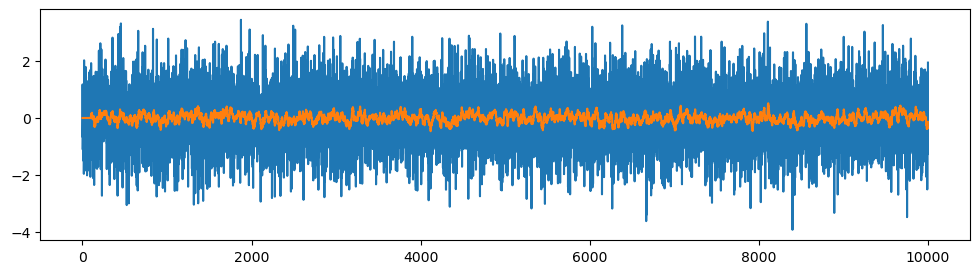

In [12]:
plt.figure(figsize=(12, 3))
plt.plot(s[0])
plt.plot(s1[0])

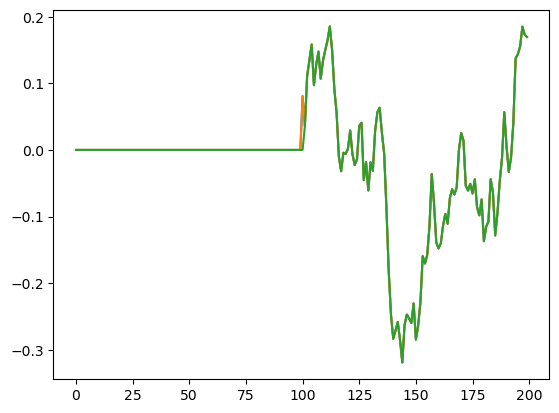

In [13]:
plt.plot(s1[0][:200])
plt.plot(e_data['f2'][:200])
plt.plot(e_data['f1'][0,:200])

f1 in answer key has a 0 instead of expected value in 101th place (index 100)

In [14]:
print(e_data['f1'][0,100])
print(e_data['f2'][100])
print(e_data['f3'][0,100])
print(e_data['f4'][0,100])

0.0
[0.08069958]
0.08069958000006854
0.08069957999924864


In [15]:
np.allclose(s1[0], e_data['f2'][:,0])

True

## Method 2: Design matrix

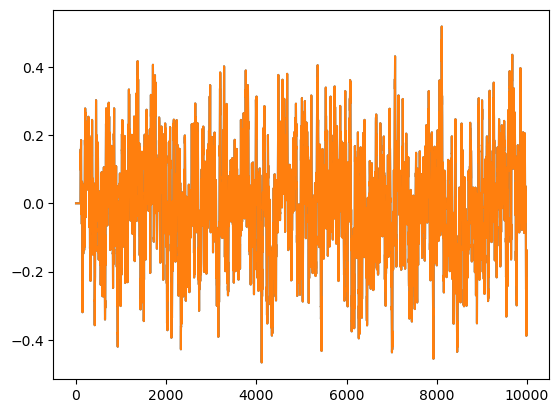

In [16]:
# Create design matrix
des_s = np.zeros((len_s, len_f))
for idx_s in np.arange(0, len_s-len_f+1): # Want to go up to len_s-len_f elements, so +1 to include that last one.
    des_s[idx_s+len_f-1,:] = s[0,idx_s:idx_s+len_f] # Want to start populating des_s at 100th element (hence len_f-1 offset)

s2 = np.dot(des_s, ff)
plt.plot(s1[0])#[100:200])
plt.plot(s2)#[100:200])

In [17]:
np.allclose(s1[0],s2)

True

## Method 3: FFT without padding

(10000,)


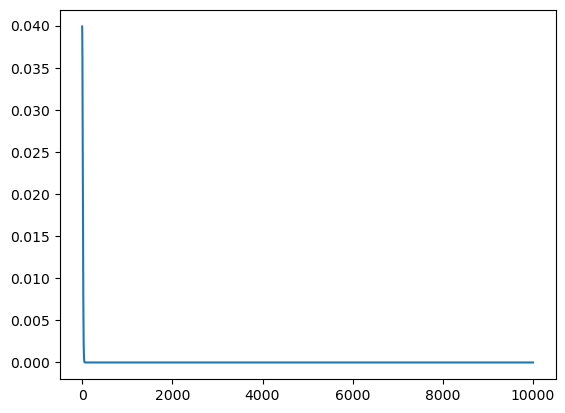

In [18]:
# Make filter same length as signal. f_e for filter_extended
t_e = np.arange(0, len_s)
f_e = gauss([mu, sigma], t_e)
print(f_e.shape)
plt.plot(f_e)

In [19]:
s3 = np.real(np.fft.ifft(np.fft.fft(f_e) * np.fft.fft(s)))
print(s3.shape)

(1, 10000)


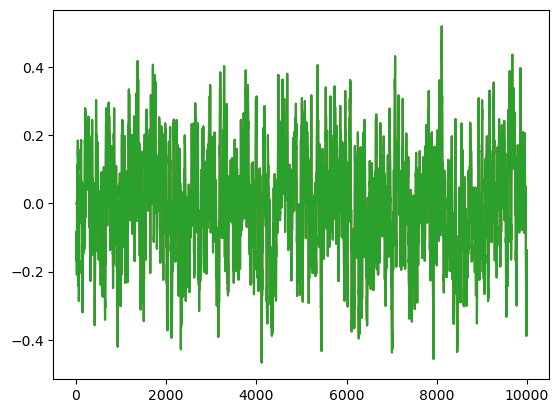

In [20]:
plt.plot(s1[0])#[100:200])
plt.plot(s2)#[100:200])
plt.plot(s3[0])#[100:200])

In [21]:
np.allclose(s1[0][100:], s3[0][100:])

True

## Method 4: FFT with padding

In [22]:
n_pad = 100
# Insert n_pad zeros after f_e and s
f_e_pad = np.append(f_e, np.zeros(n_pad))
s_pad = np.append(s, np.zeros(n_pad))
s4 = np.real(np.fft.ifft(np.fft.fft(f_e_pad) * np.fft.fft(s_pad)))
print(s4.shape)
s4 = s4[:-n_pad]
print(s4.shape)

(10100,)
(10000,)


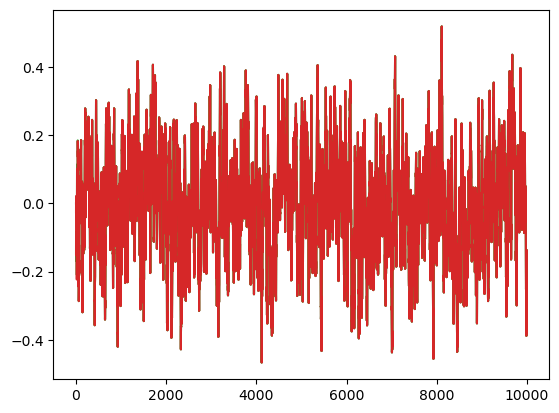

In [23]:
plt.plot(s1[0])#[100:200])
plt.plot(s2)#[100:200])
plt.plot(s3[0])#[100:200])
plt.plot(s4)

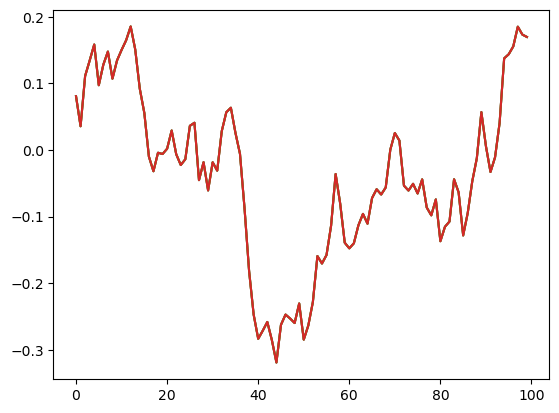

In [24]:
plt.plot(s1[0][100:200])
plt.plot(s2[100:200])
plt.plot(s3[0][100:200])
plt.plot(s4[100:200])

In [25]:
np.allclose(s1[0][100:], s4[100:])

True

## Some interesting alternates

(10000,)
(1, 10000)


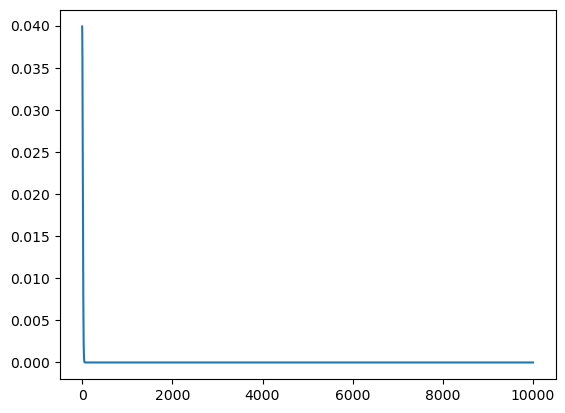

In [26]:
# Make filter same length as signal by padding zeros to f. f_p for filter padded
f_p = np.append(f, np.zeros(len_s-len_f))
print(f_p.shape)
plt.plot(f_p)
s5 = np.real(np.fft.ifft(np.fft.fft(f_p) * np.fft.fft(s)))
print(s5.shape)

In [27]:
np.allclose(s3, s5)

True